<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/2020m0/2%20Advanced/060MatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

すでに使いなれたプロッティングツール(例えばgnuplot)があるのに、おなじことをPythonでやりなおす必要は感じないと思いますが、MatPlotLibはPythonのいろんなライブラリでグラフを描くための事実上の標準になっているので、使いかたに慣れておくと、いろいろ便利なことがあります。

松本も日常MatPlotLibを使っているわけではないので、練習をかねてgnuplot (http://gnuplot.sourceforge.net) でできることを、MatPlotLibでひととおり試してみます。

gnuplotよりもMatPlotLibがすぐれている点は、それがプログラム言語の中に組みこまれていることです。生データをそのままプロットする場合にはgnuplotで十分ですが、様々なデータ処理を行った結果をプロットしたり、パラメータをリアルタイムで調整しながらグラフを描きなおしたい場合には、MatPlotLibのほうが便利かもしれません。

## 2次元: XYプロット
### 数式のプロット
gnuplotでは、数式を直接指定する方法があるが、MatPlotLibは数値のプロットしかできないので、数式をプロットしたい場合は、numpyで数値化してからプロットする。整数のリストを生じるrangeを拡張した、arangeという関数がnumpyに備わっているので、これを使えば単調増加数列は簡単に作れる。また、numpyの数学関数を使うと、arrayに対して演算ができる。

In [0]:
import numpy as np

x = np.arange(-10,10,0.1)        #xは-10から+10まで0.1間隔の値のarray
print(x)

arrayに対して通常の演算を行うと、個々の要素に作用する。この例の場合、xのすべての要素が個別に二乗される。

In [0]:
y=x**2
y

In [0]:
import matplotlib.pyplot as plt  #プロットライブラリの本体

plt.plot(x,y)

arrayに対して通常の演算を行うと、個々の要素に作用する。そのための数学関数がnumpyにすべて準備されている。

In [0]:
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-10,10,0.1)        #xは-10から+10まで0.1間隔の値のarray
y = np.exp(-x**2/5)              #yの値はxから算出する。
plt.xlim(-5,5)                 #プロット範囲指定
plt.plot(x,y)

### データのプロット
まずは、手作りデータをプロットしてみる。

In [0]:
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = [1,2,4,8,16]
y = [2,3,5,7,11]
plt.plot(x,y)

2つのy値を与えて同時にプロットすることはできるだろうか。

In [0]:
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = [1,2,4,8,16]
y = [[2,1],[3,2],[5,3],[7,4],[11,5]]
plt.plot(x,y)

numpy形式のデータでも試す。

In [0]:
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.array([1,2,4,8,16])
y = np.array([2,3,5,7,11])
plt.plot(x,y)

2本同時プロットもnumpyでできるはず。

In [0]:
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.array([1,2,4,8,16])
y = np.array([[2,1],[3,2],[5,3],[7,4],[11,5]])
plt.plot(x,y)

じゃあ、数式プロットで2本同時に線を引いてみよう。

In [0]:
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-1,1,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y = (y1,y2)
plt.plot(x,y)

なになに、xとyは同じdimensionでないといけない、と言われた。確かに、xにはx[0]からx[100]あたりまでデータがあるのに対し、yにはy[0]とy[1]しかなく、その中にarrayが入っていて、xとyの見掛けのリスト(array)の大きさが違う。そこで、yは転置してみよう。

In [0]:
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

x = np.arange(-1,1,0.1)
y1 = np.sin(x)
y2 = np.cos(x)
y = np.array((y1,y2))
print("Y before transposition:",y)
y = np.transpose(y)
print(x)
print("Y after transposition:",y)
plt.plot(x,y)

x,y座標の羅列をファイルから読みこんで、そのまま線でプロットする。

In [0]:
! wget https://github.com/vitroid/PythonTutorials/blob/master/2%20Advanced/data6.txt?raw=true -O data6.txt

import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

plotを何度も呼びだせば、同じグラフにどんどん重ねてくれるようだ。

showをはさむと、別のパネルに表示される。(たぶん)

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()
plt.plot(x,y3)

第3カラムを誤差とみなして、エラーバー付きでプロットしてみる。

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))
    
#matplotlibはnumpyのarrayでなくてもプロットできる。
#x = np.array(x)
#y = np.array(y)

plt.errorbar(x,y1,yerr=y2)

MatPlotLibでは、異なるタイプのプロットをする場合には、それぞれ異なる関数を呼ぶらしい。(関数名に一貫した命名規則がないのが、matplotlibの使いにくいところです。全く覚えられないので、常にマニュアルを見ながら使うことになります。)

点でプロットする場合には、plot関数の3番目の引数で指定する。(http://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html)

線のスタイルを変更するオプションもいろいろある。(http://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html)

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))

#matplotlibはnumpyのarrayでなくてもプロットできるが、arrayのほうが便利
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)


plt.plot(x,y1,".")
plt.plot(x,y2+y3,linewidth=3)


せっかく画面にきれいに描けても、論文に載せられないとありがたくない。PDFでの出力を試す。(http://matplotlib.org/api/backend_pdf_api.html)

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt  #プロットライブラリの本体
from matplotlib.backends.backend_pdf import PdfPages  #PDF出力

#data6.txtは4カラムのデータ。第1カラムが時刻。
file = open("data6.txt")
x = []
y1 = []
y2 = []
y3 = []

for line in file:
    cols = line.split()
    if len(cols) > 3:
        x.append(float(cols[0]))
        y1.append(float(cols[1]))
        y2.append(float(cols[2]))
        y3.append(float(cols[3]))

#matplotlibはnumpyのarrayでなくてもプロットできるが、arrayのほうが便利
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)


plt.plot(x,y1,".")
plt.plot(x,y2+y3,linewidth=3)
#フォントを指定し、labelを付ける。
plt.rc('font', family='serif')
plt.title("Title here", color="red")
plt.xlabel('Time / sec', fontsize = 18)
plt.ylabel('Values',     fontsize = 18)

#PDF化のために追加
pp = PdfPages('test.pdf')   #colabのディスクスペースに書きこまれます。
pp.savefig()
pp.close()


MatPlotLibのサンプルページ(http://matplotlib.org/gallery.html )を見ると、ほかにも相当いろんな表現ができるようだ。全部網羅していては時間が足りないので、必要があればその都度紹介することにする。

## 3次元データ

matplotlibで3次元プロットはできるのだが、その場で回転させていろんな角度から表示することができない。(正確に言えば、ローカル環境では可能だが、Colabでは使えない)また、matplotlibの三次元描画は隠面処理にかなり問題があり、完成度の高い画像を作ろうとするといろいろ苦労するので、おすすめできない。

そこで、3次元プロットには別のモジュール、plotlyを採用してみる。さいわい、plotlyはcolabに標準でインストールされているようだ。

In [0]:
import plotly.graph_objects as go

# mgridはlinspaceの多次元版のようなもの。等間隔の数値が入ったarrayを自動生成する。
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
# X, Yの関数Zを計算する。
Z = np.abs(np.cos(X) + np.cos(Y))

# Ref.: https://plotly.com/python/3d-surface-plots/
surf = go.Surface(x=X, y=Y, z=Z, contours= {"z": {"show": True}})
fig = go.Figure(surf)
fig.update_layout(scene={"xaxis": {"title": "X-label"},
                         "yaxis": {"title": "Y-label"},
                         "zaxis": {"title": "Z-label"}})
fig.show()

## 4次元データ

電子軌道の空間分布のような、三次元空間内の濃度を表現することは、4次元データプロットと言えます。(x,yに対してzの値をプロットするのが3次元プロットなら、x,y,zに対して濃度を表現することは4次元)

ひとつの方法は、三次元の散布図として描くことです。


In [0]:
import numpy as np

# mgridはlinspaceの多次元版のようなもの。等間隔の数値が入ったarrayを自動生成する。
X, Y, Z = np.mgrid[-5:5:0.2, -5:5:0.2, -5:5:0.2]
# X, Y, Zに対するガウス関数Dを計算する。
D = np.exp(-(X**2+Y**2+Z**2)/3)

# Dと同じ大きさの0-1乱数
r = np.random.rand(*X.shape)

# 乱数よりも値が大きい点だげを抜粋する(fancy index)
Xp = X[D>r]
Yp = Y[D>r]
Zp = Z[D>r]


import plotly.graph_objects as go

dataframe = np.array([Xp, Yp, Zp]).T
fig = go.Figure(data=[go.Scatter3d(x=Xp,
                                   y=Yp,
                                   z=Zp,
                                   mode="markers",
                                   marker=dict(size=1))])
fig.show()


点の数が十分多ければ、これでも形を把握できるかもしれませんが、誤解を生みそうなので、もっと良い方法として、三次元の等高面を描きます。 https://plotly.com/python/3d-isosurface-plots/



In [0]:
import numpy as np

# mgridはlinspaceの多次元版のようなもの。等間隔の数値が入ったarrayを自動生成する。
# データ間隔を指定する部分に虚数を与えると、データ個数の指定になるらしい。(わかりにくい)
X, Y, Z = np.mgrid[0:2:20j, 0:2:20j, 0:2:20j]
# X, Y, Zに対するガウス関数Dを計算する。
D = np.exp(-(X**2+Y**2+Z**2)/3)


import plotly.graph_objects as go

fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=D.flatten(),
    isomin=0.0,
    isomax=1.0,
    opacity=0.6,
    surface_count=10,
    caps=dict(x_show=False, y_show=False, z_show=False)
    ))
fig.show()

## アニメーション

Plotlyのアニメーション機能はかなりすぐれているようだが、私はまだ紹介できるほど知識がないので、[リンク先](https://plotly.com/python/animations/)のページで遊んでほしい。PlotlyのサンプルプログラムをColabにもってきて、何も手を加えなくても同じように動く。


In [0]:
import plotly.graph_objects as go

import numpy as np

# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.show()

# 使用例

ミク関数を作ってみよう。ミク関数とは、グラフにプロットすると初音ミクの姿になるような関数である。→ https://nlab.itmedia.co.jp/nl/articles/1305/02/news063.html

平面上の任意の曲線は、あたりまえだがペンを動かせば描くことができる。ペンを下ろした時刻を0とし、その後の時刻$t$でのペンの位置(座標)$(x,y)$を、時刻$t$の関数と考える。線がとぎれると面倒なので、ペンは最後まで上げないことにしよう(一筆書)。

すると、どんな風にペンを動かすかはともかく、ペンの動きを時間の関数としてプロットできるはずだ。

例えば、時刻0に原点を出発し、時刻1に座標(10,0)、時刻2に座標(10,20)、時刻3に座標(0,20)、そして時刻4で(0,0)に戻ってくれば、10x20の長方形を描ける。この時のペンのx座標とy座標の関数は次のように描ける。

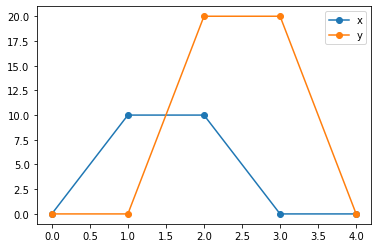

In [7]:
import numpy as np
from matplotlib import pyplot as plt

points=np.array([[0,0,0],[1,10,0],[2,10,20],[3,0,20],[4,0,0]])

plt.plot(points[:,0],points[:,1], "-o", label="x")
plt.plot(points[:,0],points[:,2], "-o", label="y")
plt.legend()
plt.show()

x座標とy座標を対応させてプロットするとたしかに長方形になる。

In [0]:
plt.plot(points[:,1], points[:,2])

これを、いかにも関数っぽく見せるために、わざとこの折れ線を何らかのスムーズな関数で近似して、時間の連続関数として表すのである。例えば3次多項式で近似してみることにする。

numpyのpolyfitを使う。まずはx座標。

In [0]:
coeffx3 = np.polyfit(points[:,0], points[:,1], 3)
coeffx3

結果は3次多項式の係数のようだ。これらを係数にもつ3次関数の値はpoly1d関数で生成できる。

In [0]:
# tは0〜4を21に細分した点
t = np.linspace(0,4,21)

# poly1dはtそれぞれでの3次関数の値を計算する
xx = np.poly1d(coeffx3)(t)
print(t)
print(xx)

In [0]:
plt.plot(points[:,0],points[:,1], label="raw x")
plt.plot(t, xx, label="fit x (3)")

同じように、yもフィットする。

In [0]:
coeffy3 = np.polyfit(points[:,0], points[:,2], 3)
# poly1dはtそれぞれでの3次関数の値を計算する
yy = np.poly1d(coeffy3)(t)
print(t)
print(yy)
plt.plot(points[:,0],points[:,2], label="raw y")
plt.plot(t, yy, label="fit y (3)")

フィットした曲線でプロットすると?

In [0]:
plt.plot(xx,yy)

長方形からはだいぶ外れてしまった。でも、中間点を増やし、フィットする関数の次数を上げてやれば、もう少し長方形らしくできる、はず。

中間点を増やすのに、numpyのinterpolate関数`interp`を使う。
https://numpy.org/doc/stable/reference/generated/numpy.interp.html

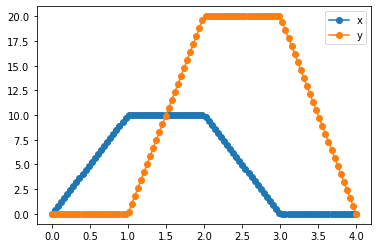

In [8]:
t = points[:,0] # 5点
x = points[:,1]
y = points[:,2]

# もっと細かい目盛を準備する。
tfine = np.linspace(0.0, 4.0, 100) #0〜4を100等分

xfine = np.interp(tfine, t, x)
yfine = np.interp(tfine, t, y)

plt.plot(tfine, xfine, "-o", label="x")
plt.plot(tfine, yfine, "-o", label="y")
# plt.plot(points[:,0],points[:,2], "-o", label="y")
plt.legend()

In [0]:
# polyfitが多項式近似して係数を返す。
coeffx = np.polyfit(tfine, xfine, 10)
# poly1dはtそれぞれの位置での多項式の値を計算する
xfit = np.poly1d(coeffx)(tfine)

plt.plot(tfine, xfine, "-o", label="raw x")
plt.plot(tfine, xfit,  label="fit x (10)")

In [0]:
# polyfitが多項式近似して係数を返す。
coeffy = np.polyfit(tfine, yfine, 12)
# poly1dはtそれぞれの位置での多項式の値を計算する
yfit = np.poly1d(coeffy)(tfine)

plt.plot(tfine, yfine, "-o", label="raw y")
plt.plot(tfine, yfit, label="fit y (12)")

In [0]:
plt.plot(xfine,yfine)
plt.plot(xfit, yfit)

まだまだですね。でもこんな感じで、点の数をうんと増やしていけば、どんな複雑な曲線でも数式で表せます。多項式や三角関数でフィットする場合には、もとの図形も角がないほうがうまくフィットできます。

# 使用例2

多項式を使う代わりに、フーリエ級数展開を使って近似することはできるでしょうか。

`numpy`の高速フーリエ変換関数の使い方は以下の通りです。

In [10]:
np.fft.fft(xfine)

array([ 4.94949495e+02+0.00000000e+00j, -1.98227216e+02-2.07768787e+02j,
       -2.02020202e-01+3.21101916e+00j, -2.48468514e+01+2.15401155e+01j,
        2.47073205e-15-4.12943013e-15j, -6.87872862e+00-8.69097655e+00j,
       -2.02020202e-01+1.05902699e+00j, -5.04810459e+00+3.59141485e+00j,
        4.18769867e-15+8.55367843e-15j, -1.79909027e+00-2.74111731e+00j,
       -2.02020202e-01+6.21754250e-01j, -2.22074883e+00+1.27803968e+00j,
        2.08769305e-14+6.77339582e-15j, -7.12975186e-01-1.31222680e+00j,
       -2.02020202e-01+4.29314782e-01j, -1.27564657e+00+5.79906009e-01j,
       -2.32132815e-14+1.27963740e-14j, -3.37022433e-01-7.48408592e-01j,
       -2.02020202e-01+3.18332901e-01j, -8.35684053e-01+2.88778402e-01j,
       -2.84217094e-14+2.70306520e-14j, -1.76328157e-01-4.65982369e-01j,
       -2.02020202e-01+2.44200475e-01j, -5.90073223e-01+1.45342713e-01j,
        1.76594943e-15+6.39474181e-15j, -1.01010101e-01-3.03030303e-01j,
       -2.02020202e-01+1.89709597e-01j, -4.36135340

100個のデータが出てきました。この数値の意味は?



In [0]:
?np.fft.fft

ドキュメントを見ても詳細はわかりません。実は、フーリエ変換(フーリエ級数)の定義は業界によって微妙に違っているので、得られた係数を何も考えずに使うと間違うことがあります。

一般的には、プログラム言語に組みこまれている高速フーリエ変換は以下のような計算をすることが多いです。
$$ F(k)=\sum_{n=0}^{N-1} f(n)\exp\left(-{2\pi n k i\over N}\right)$$

ただし、$f(n)$は元データの$n$個目、$i$は虚数単位です。

実際にそうなっているか、手計算で$k=2$の場合を計算してみます。

In [14]:
k = 2.0
N = 100  # number of data in xfine
n = np.arange(0.0, 100.0)
np.sum(xfine * np.exp(-2*np.pi*n*k*1j/N))

(-0.20202020202022197+3.211019160376864j)

ビンゴ! `np.fft.fft()`関数の出力の2番目の値(最初が0番目)に一致しました。

得られる値は複素数です。フーリエ変換は、一般的には複素数を複素数に変換します。それなら、x軸とy軸を別々に近似するのではなく、図を複素平面に描くことにすれば、近似が一発でできるはずです。